# Using `pyND.gbt.GBTsurvey`

This code reads an entire survey from a GBTIDL FITS file.

In [1]:
# Typical imports here
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pyND.gbt import *

## Loading GBT spectra from GBTIDL ASCII output

In [4]:
input_filename = 'data/GBTdata.fits'
x = GBTsurvey.from_GBTIDL(input_filename)

In [5]:
x.index

object,idx,l,b,RA,DEC
str17,int64,float64,float64,float64,float64
HS0033+4300,0,120.02580305131431,-19.50893571506515,9.095833333333333,43.27784722222222
HS0058+4213,1,124.913695905791,-20.33971225362076,15.379875,42.49323888888889
RXSJ0043.6+372521,2,121.23275981643661,-25.42430042079452,10.92708333333333,37.42194444444444
ZW535.012,3,120.1742336806232,-17.12615361630781,9.087166666666667,45.66478333333333
Q0030+3700,4,118.24977053541394,-25.66441146071791,7.572500000000001,37.015


## Save to a pickle file

In [6]:
x.save2pickle('data/GBTdata.pkl')

## Sort by latitude

In [7]:
x.sort('b')
x.index['b'].data

array([-25.66441146, -25.42430042, -20.33971225, -19.50893572,
       -17.12615362])

In [8]:
x.sort('b',reverse=True)
x.index['b'].data

array([-17.12615362, -19.50893572, -20.33971225, -25.42430042,
       -25.66441146])

## Plot the first spectrum

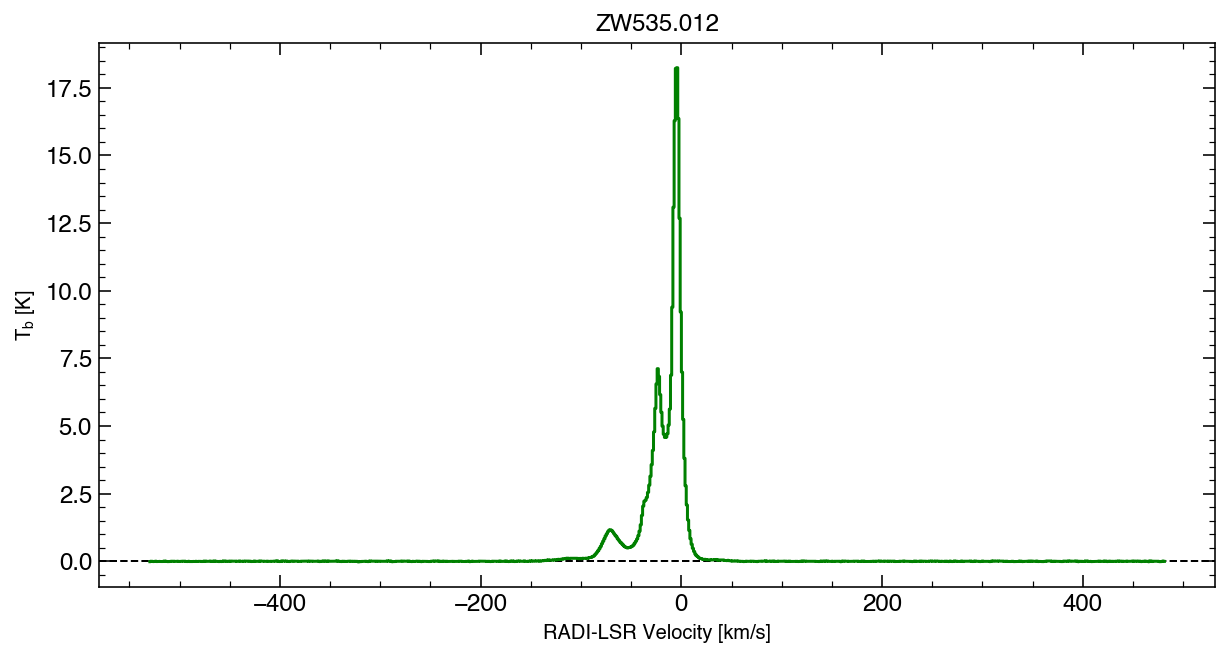

In [9]:
x.survey[0].plotspectrum()

## Plot all of the spectra

In [10]:
# for j in np.arange(len(x.index)):
#     x.survey[j].plotspectrum()

# Examining the metadata

In [11]:
x.data_file,x.GBTFITS_file

('data/GBTdata.pkl',
 '/Users/howk/Dropbox (KODIAQ)/python/pyND/gbt/docs/data/GBTdata.fits')

# Resample the velocity grid of the entire survey

In [12]:
x_new = x.copy()
new_velocity = np.arange(-400,100,10.)
x_new.resample_survey(new_velocity)

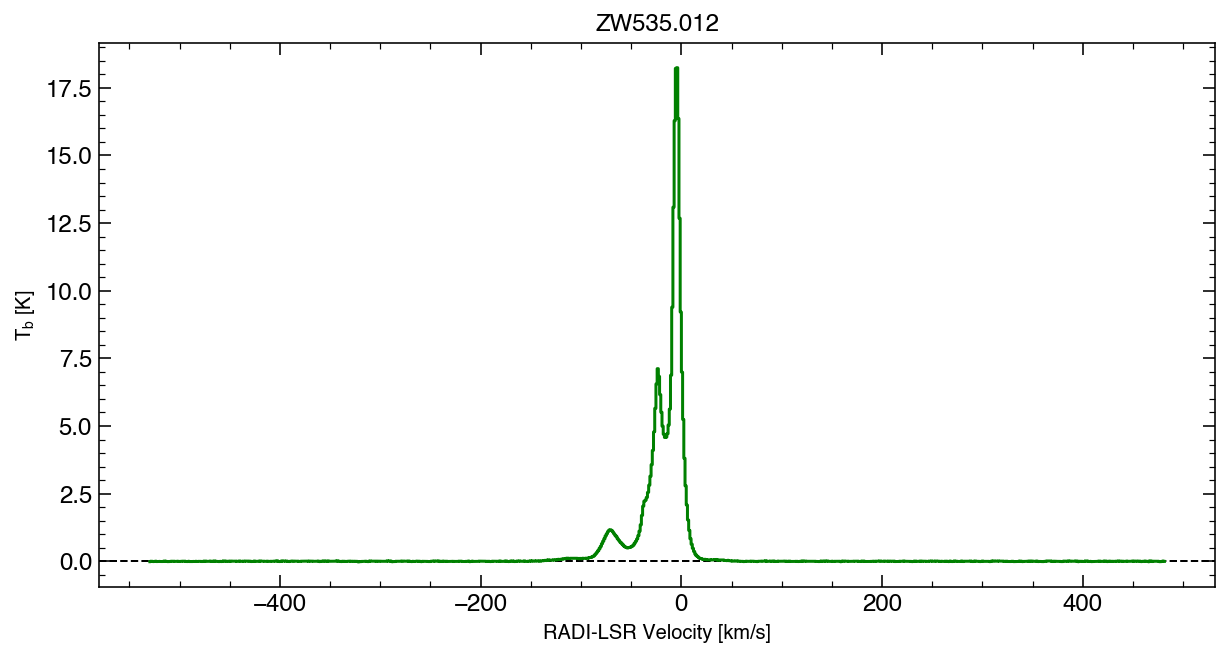

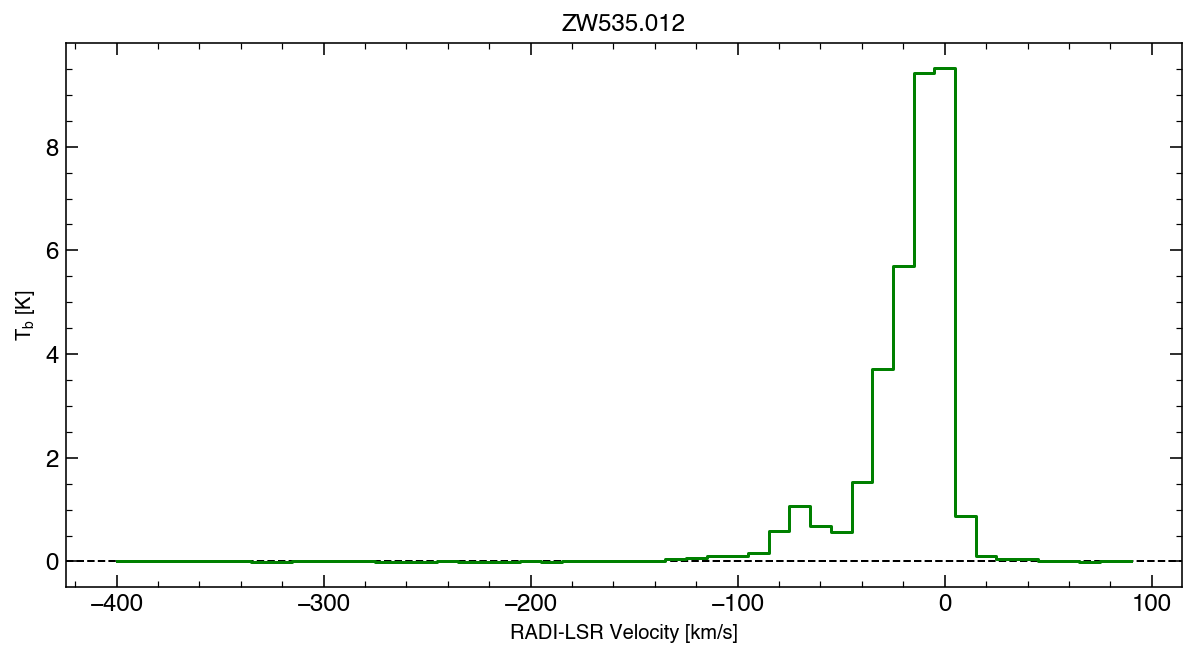

In [13]:
x.survey[0].plotspectrum()
x_new.survey[0].plotspectrum()

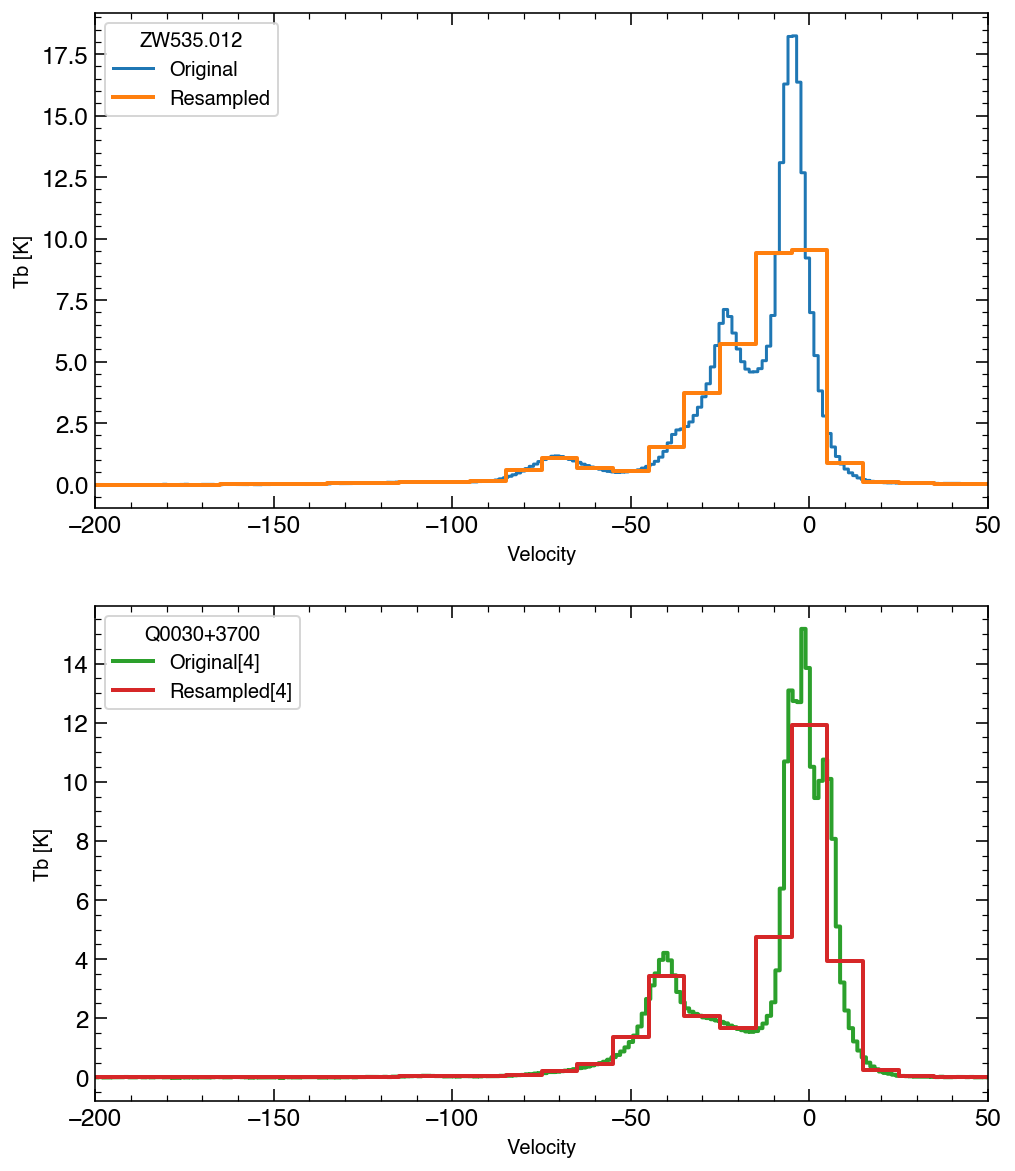

In [30]:
fig=plt.figure(figsize=(8,10))

ax1=fig.add_subplot(211)
ax1.plot(x.survey[0].velocity,x.survey[0].Tb,drawstyle='steps-mid',label='Original')
ax1.plot(x_new.survey[0].velocity,x_new.survey[0].Tb,drawstyle='steps-mid',label='Resampled',lw=2)

ax1.set_xlim(-200,50)
ax1.set_xlabel('Velocity')
ax1.set_ylabel('Tb [K]')
ax1.legend(loc='upper left',title=x.index['object'][0])

ax2=fig.add_subplot(212)
ax2.plot(x.survey[4].velocity,x.survey[4].Tb,drawstyle='steps-mid',
         label='Original[4]',lw=2,color='C2')
ax2.plot(x_new.survey[4].velocity,x_new.survey[4].Tb,drawstyle='steps-mid',
         label='Resampled[4]',lw=2,color='C3')

ax2.set_xlim(-200,50)
ax2.set_xlabel('Velocity')
ax2.set_ylabel('Tb [K]')
ax2.legend(loc='upper left',title=x.index['object'][4])